In [1]:
# Training DCNN on preprocessed 128×128 images with the Smiling label
# Cell Purpose: Imports
# 📦 Essential Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 🧠 Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
# Cell Purpose: Configuration
# Configuration Constants
IMAGE_DIR = "../data/img_align_preprocessed"
ATTR_PATH = '../data/list_attr_celeba.csv'
LABEL_COLUMN = "Smiling"
NUM_IMAGES = 20000
IMG_SIZE = (128, 128)
BATCH_SIZE = 64
EPOCHS = 15


In [3]:
# Cell Purpose: Load labels
# Load attribute file (skip metadata row, don’t use first col as index)
attr_df = pd.read_csv(ATTR_PATH)

# Rename the first column (filename column)
attr_df.rename(columns={attr_df.columns[0]: "filename"}, inplace=True)
attr_df.set_index("filename", inplace=True)

# Print to confirm the actual column names (you should now see "Smiling")
print("Final column names:", attr_df.columns.tolist())

# Normalize the Smiling column
attr_df["Smiling"] = attr_df["Smiling"].apply(lambda x: 1 if x == 1 else 0)


# Filter only the first NUM_IMAGES images that exist in the folder
image_files = sorted(os.listdir(IMAGE_DIR))[:NUM_IMAGES]
attr_df = attr_df.loc[image_files]

print(f"Loaded {len(attr_df)} labels for images")


Final column names: ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
Loaded 20000 labels for images


In [4]:
# Cell Purpose: Load images
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

X = []
y = attr_df[LABEL_COLUMN].values

for fname in tqdm(attr_df.index):
    path = os.path.join(IMAGE_DIR, fname)
    img = load_img(path, target_size=IMG_SIZE)
    arr = img_to_array(img) / 255.0  # Normalize
    X.append(arr)

X = np.array(X)
y = np.array(y)


100%|██████████| 20000/20000 [00:49<00:00, 405.11it/s]


In [5]:
# Cell Purpose: Data Preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)} | Test samples: {len(X_test)}")


Training samples: 16000 | Test samples: 4000


In [6]:
# Cell Purpose: Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


c:\Users\USER-PC\Documents\ITRI616_ML_PROJECT\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Cell Purpose: Compile and Train
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE)


Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.6084 - loss: 0.6457 - val_accuracy: 0.8475 - val_loss: 0.3785
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8478 - loss: 0.3609 - val_accuracy: 0.8763 - val_loss: 0.2906
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8775 - loss: 0.2971 - val_accuracy: 0.8935 - val_loss: 0.2645
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8890 - loss: 0.2717 - val_accuracy: 0.8945 - val_loss: 0.2549
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9004 - loss: 0.2483 - val_accuracy: 0.8997 - val_loss: 0.2505
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9080 - loss: 0.2263 - val_accuracy: 0.8988 - val_loss: 0.2406
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9120 - loss: 0.2171 - val_accuracy: 0.9007 - val_loss: 0.2325
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9158 - loss: 0.2125 - 

In [8]:
import os
import datetime

# Ensure the 'models' directory exists
os.makedirs("models", exist_ok=True)

# Generate timestamped filename
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M")
model_path = f"models/smile_cnn_model_{timestamp}.keras"
model.save(model_path)
print(f"Model saved as {model_path}")


Model saved as models/smile_cnn_model_20250523_1709.keras


In [9]:
# Cell Purpose: Evaluate model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.9115


In [10]:
from sklearn.metrics import classification_report

# Predict class labels
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Not Smiling", "Smiling"]))


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Classification Report:

              precision    recall  f1-score   support

 Not Smiling       0.90      0.93      0.92      2083
     Smiling       0.92      0.89      0.91      1917

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000



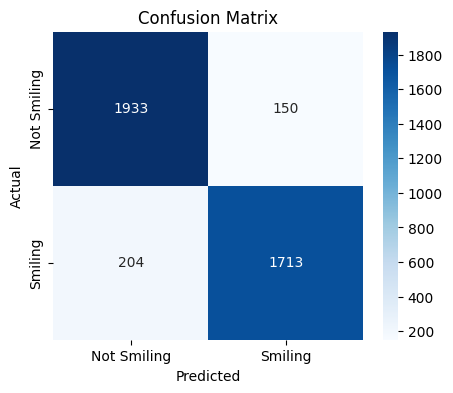

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Not Smiling", "Smiling"],
            yticklabels=["Not Smiling", "Smiling"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


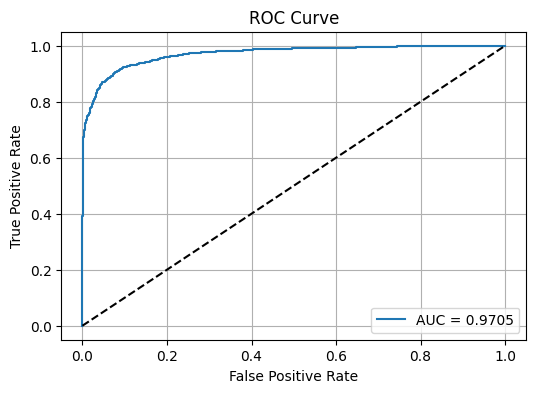

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_pred_prob = model.predict(X_test)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


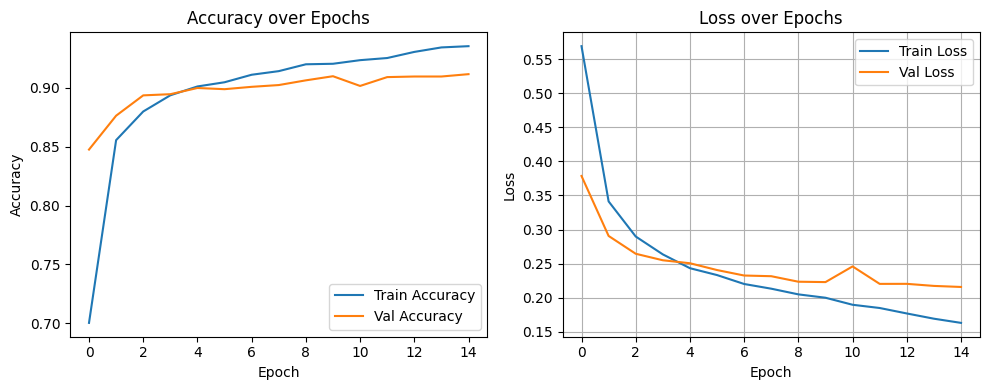

In [13]:
# Cell Purpose: Plot Training History
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()
